In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# from leuschner import Spectrometer

In [11]:
%pwd
%cd ../scripts

c:\Users\darby\OneDrive\Desktop\Leuschner_Spectrometer\scripts


In [12]:
# from average_spec import average

def average(data, name):
    avg = []
    for i in range(1, len(data)):
        d = data[i].data[name]
        avg.append(d)
    average = np.mean(avg, axis=0)
    return average

#### Build and initialize spectrometer

In [13]:
spec = Spectrometer(fpgfile='../fpga/ugradio_corrspec_2022-02-22_0905.fpg')

NameError: name 'Spectrometer' is not defined

In [ ]:
spec.initialize()

2022-07-29 21:51:32,606 - hera_corr_f.snap_fengine(localhost) - INFO - Initializing block: sync
2022-07-29 21:51:32,628 - hera_corr_f.blocks:localhost - INFO - sync - Changed sync period to 0.00
2022-07-29 21:51:32,630 - hera_corr_f.snap_fengine(localhost) - INFO - Initializing block: input
2022-07-29 21:51:32,699 - hera_corr_f.snap_fengine(localhost) - INFO - Initializing block: delay
2022-07-29 21:51:32,787 - hera_corr_f.snap_fengine(localhost) - INFO - Initializing block: pfb
2022-07-29 21:51:32,842 - hera_corr_f.snap_fengine(localhost) - INFO - Initializing block: eq_core
2022-07-29 21:51:33,355 - hera_corr_f.snap_fengine(localhost) - INFO - Initializing block: chan_reorder


In [ ]:
spec.is_running(), spec.is_connected()

(True, True)

# Connecting to Brock's HERA node using PAM4

In [ ]:
freqs = np.fft.fftshift(np.fft.fftfreq(2*1024, 1/500))[1024:]

### Not connected to FEM

In [ ]:
# Auto-correlations
spec.read_spec(filename='fits_files/characterization_tests/PAM4_no_FEM_auto.fits',
               nspec=12,
               coords=[60,15],
               coord_sys='ga')

In [ ]:
auto = fits.open('../playground/fits_files/characterization_tests/PAM4_no_FEM_auto.fits')

auto0_avg = average(auto, 'auto0_real')
auto1_avg = average(auto, 'auto1_real')

<Figure size 640x480 with 0 Axes>

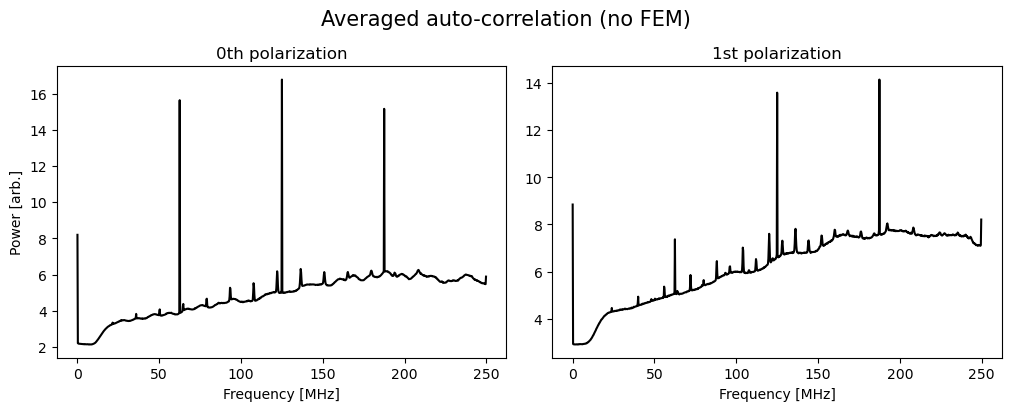

In [ ]:
plt.figure()
fig, [ax0, ax1] = plt.subplots(1,2, figsize=(10,4), constrained_layout=True)
plt.suptitle('Averaged auto-correlation (no FEM)', fontsize=15)
ax0.plot(freqs, auto0_avg, 'k')
ax1.plot(freqs, auto1_avg, 'k')
ax0.set_title('0th polarization')
ax1.set_title('1st polarization')
ax0.set_xlabel('Frequency [MHz]')
ax1.set_xlabel('Frequency [MHz]')
ax0.set_ylabel('Power [arb.]')
plt.show()

In [ ]:
# Cross-correlation
spec.read_corr(filename='fits_files/characterization_tests/PAM4_no_FEM_cross.fits',
               nspec=12,
               coords=[60,15],
               coord_sys='ga')

In [ ]:
cross = fits.open('../playground/fits_files/characterization_tests/PAM4_no_FEM_cross.fits')

cross_real_avg = average(cross, 'cross_real')
cross_imag_avg = average(cross, 'cross_imag')

cross_angle = np.angle(cross_real_avg+1j*cross_imag_avg)

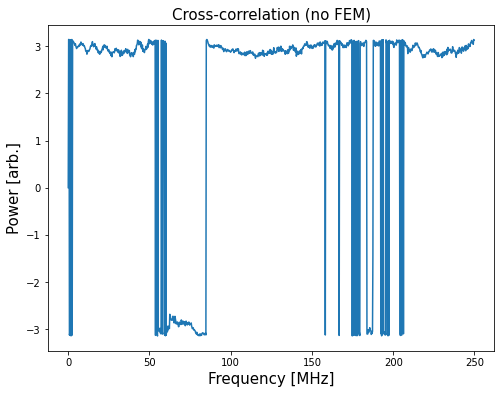

In [ ]:
%matplotlib inline

plt.figure(figsize=(8,6))
# plt.plot(freqs, cross_real_avg, label='real')
# plt.plot(freqs, cross_imag_avg, label='imag')
# plt.legend(fontsize=12)
plt.plot(freqs, cross_angle)
plt.title('Cross-correlation (no FEM)', fontsize=15)
plt.ylabel('Power [arb.]', fontsize=15)
plt.xlabel('Frequency [MHz]', fontsize=15)
plt.show()

### Connected to FEM

In [ ]:
# Auto-correlations
spec.read_spec(filename='fits_files/characterization_tests/PAM4_with_FEM_auto.fits',
               nspec=12,
               coords=[60,15],
               coord_sys='ga')

In [ ]:
auto_FEM = fits.open('../playground/fits_files/characterization_tests/PAM4_with_FEM_auto.fits')

auto0_FEM_avg = average(auto_FEM, 'auto0_real')
auto1_FEM_avg = average(auto_FEM, 'auto1_real')

<Figure size 432x288 with 0 Axes>

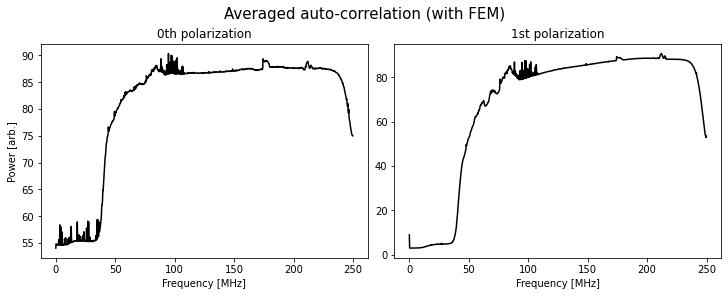

In [ ]:
plt.figure()
fig, [ax0, ax1] = plt.subplots(1,2, figsize=(10,4), constrained_layout=True)
plt.suptitle('Averaged auto-correlation (with FEM)', fontsize=15)
ax0.plot(freqs, auto0_FEM_avg, 'k')
ax1.plot(freqs, auto1_FEM_avg, 'k')
ax0.set_title('0th polarization')
ax1.set_title('1st polarization')
ax0.set_xlabel('Frequency [MHz]')
ax1.set_xlabel('Frequency [MHz]')
ax0.set_ylabel('Power [arb.]')
plt.show()

In [ ]:
# Cross-correlation
spec.read_corr(filename='fits_files/characterization_tests/PAM4_with_FEM_cross.fits',
               nspec=12,
               coords=[60,15],
               coord_sys='ga')

In [ ]:
cross_FEM = fits.open('../playground/fits_files/characterization_tests/PAM4_with_FEM_cross.fits')

cross_FEM_real_avg = average(cross_FEM, 'cross_real')
cross_FEM_imag_avg = average(cross_FEM, 'cross_imag')

cross_FEM_angle = np.angle(cross_FEM_real_avg+1j*cross_FEM_imag_avg)
cross_FEM_angle = np.where(cross_FEM_angle<-1, cross_FEM_angle+2*np.pi, cross_FEM_angle)

# angle = np.angle(cross_FEM[1].data['cross_real']+1j*cross_FEM[1].data['cross_imag'])
# angle= np.where(angle<-1, angle+2*np.pi, angle)

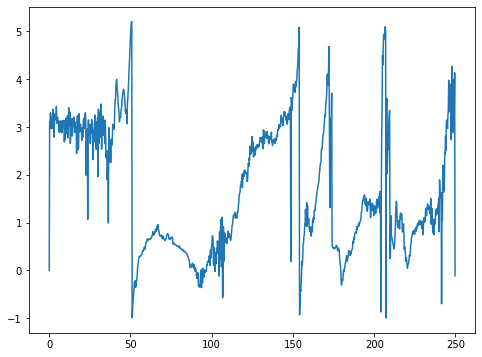

In [ ]:
plt.figure(figsize=(8,6))
# plt.plot(freqs, cross_FEM_real_avg, label='real')
# plt.plot(freqs, cross_FEM_imag_avg, label='imag')
# plt.legend()
plt.plot(freqs, cross_FEM_angle)
# plt.title('Cross-correlation (with FEM)')
# plt.ylabel('Power [arb.]')
# plt.xlabel('Frequency [MHz]')
plt.show()

# Connecting the SNAP to UGR bighorn

The SNAP was moved into the ugradio lab. With Matt's help, we added a 20dB amplifier and low-pass filter, respectively, below the BPF. The signal was then fed into a power splitter, wherein one end was fed into port 0 of ADC0 and the other end was fed into the SDR, which then connected to the RPi4. This split was done in the hopes of collecting data through both outlets to compare the results as needed. Given the mixing and manipulations done to the set-up, we should expect to see the 21cm line peak(s) at 190 MHz.

In [ ]:
freqs = np.fft.fftshift(np.fft.fftfreq(2*1024, 1/500))[1024:]

In [ ]:
snap_horn = fits.open('../playground/fits_files/characterization_tests/SNAP_bighorn_test.fits')

# snap_horn.info()
horn_data = []
for i in range(1, len(snap_horn)):
    data = snap_horn[i].data['auto0_real']
    horn_data.append(data)

snap_avg = np.mean(horn_data, axis=0)
# snap_avg = average(snap_horn, 'auto0_real') # auto-correlated data
#snap_avg.shape = (-1, 512)
freqs = freqs[::2]


In [ ]:
AVG = np.mean(snap_avg, axis=0)

<IPython.core.display.Javascript object>


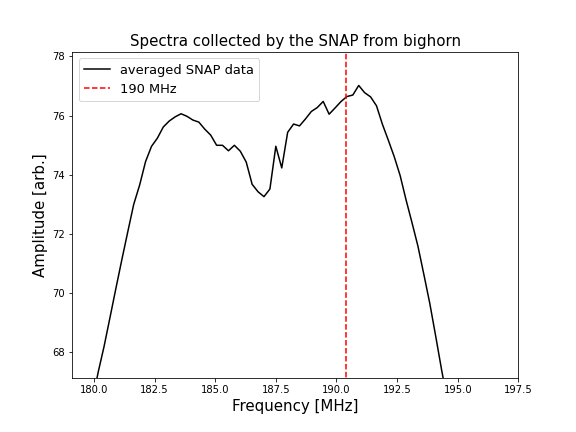

In [ ]:
%matplotlib notebook

plt.figure(figsize=(8,6))
plt.title('Spectra collected by the SNAP from bighorn', fontsize=15)
plt.plot(freqs, snap_avg, 'k', label='averaged SNAP data')
plt.vlines(190.4, 0, 85, color='red', linestyles='dashed',label='190 MHz')
plt.legend(loc='upper left', fontsize=13)
plt.xlabel('Frequency [MHz]', fontsize=15)
plt.ylabel('Amplitude [arb.]', fontsize=15)
plt.show()

In [ ]:
# freqs

In [ ]:
import ugradio

In [ ]:
ugradio.pico.capture_data(volt_range='1V', dual_mode=True, divisor=10, nsamples=1024)

TimeoutError: [Errno 110] Connection timed out

In [ ]:
ugradio.pico.VOLT_RANGE


['50mV', '100mV', '200mV', '500mV', '1V', '2V', '5V', '10V', '20V']

In [ ]:
sdr_bighorn = []
for spec in range(12):
    sdr = ugradio.sdr.capture_data_direct(nsamples=1024)
    fft = np.fft.fft(sdr)
    ps = np.abs(fft)**2
    sdr_bighorn.append(ps)

In [ ]:
sdr_bighorn = np.array(sdr_bighorn)
sdr_bighorn.shape

(12, 1024)

In [ ]:
sdr_bighorn_avg = np.mean(sdr_bighorn, axis=0)

In [ ]:
sdr_bighorn_avg.shape

(1024,)

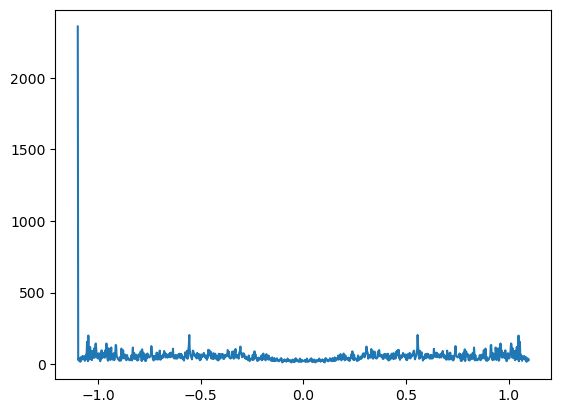

In [ ]:
vs = 2.2   # [MHz]
freqs_sdr = np.fft.fftshift(np.fft.fftfreq(1024, 1/vs))

plt.plot(freqs_sdr, sdr_bighorn_avg)
plt.show()

In [ ]:
### Uhhh so I don't remember how to manipulate the sdr output data lol ;)

## Connected to a noise generator -- test of cross-correlation

In [2]:
cross = fits.open('fits_files/characterization_tests/100_noise_gen_cross_test.fits')

In [3]:
def average(data, name):
    avg = []
    for i in range(1, len(data)):
        d = data[i].data[name]
        avg.append(d)
    average = np.mean(avg, axis=0)
    return average

In [4]:
cross_real_avg = average(cross, 'cross_real')
cross_imag_avg = average(cross, 'cross_imag')

phase = np.angle(cross_real_avg+1j*cross_imag_avg)

In [5]:
freqs = np.fft.fftshift(np.fft.fftfreq(2*1024, 1/500))[1024:]

In [10]:
%matplotlib notebook
# %matplotlib inline

<IPython.core.display.Javascript object>


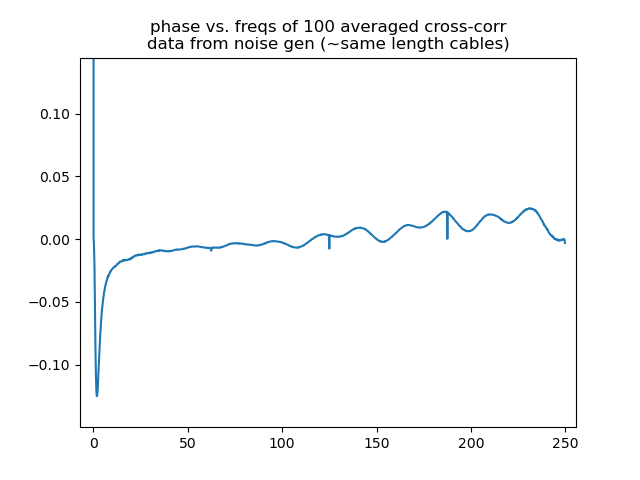

In [15]:
plt.figure()
plt.plot(freqs, phase)
plt.title('phase vs. freqs of 100 averaged cross-corr\ndata from noise gen (~same length cables)')
plt.show()

In [16]:
cross_cables = fits.open('fits_files/characterization_tests/100_noise_gen_cross_test_varying_cable_length.fits')

In [17]:
cross_cables_real_avg = average(cross_cables, 'cross_real')
cross_cables_imag_avg = average(cross_cables, 'cross_imag')

phase_cables = np.angle(cross_cables_real_avg+1j*cross_cables_imag_avg)

<IPython.core.display.Javascript object>


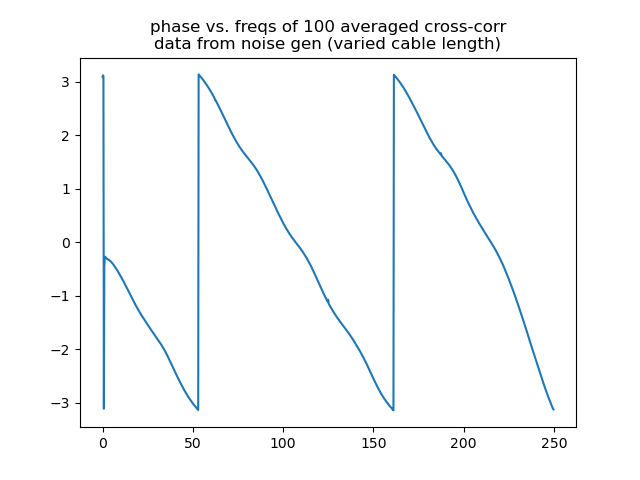

In [19]:
plt.figure()
plt.plot(freqs, phase_cables)
plt.title('phase vs. freqs of 100 averaged cross-corr\ndata from noise gen (varied cable length)')
plt.show()